In [ ]:
pip install statsmodels 

In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import scipy.stats
from scipy import stats
from scipy.stats import chi2
from io import StringIO
import time
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score,median_absolute_error,explained_variance_score,max_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",1000)
import statsmodels.api as sm
from scipy.stats import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from pytz import timezone 
import warnings
warnings.simplefilter("ignore")
from datetime import datetime,timedelta

In [2]:
data=pd.read_csv("cars.csv")
data

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.,5,85,False,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.,4,20,False,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.,3,63,False,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Брестская обл.,7,156,False,True,False,False,False,False,False,False,False,True,490


In [3]:
df=pd.DataFrame(data)
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.,5,85,False,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.,4,20,False,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.,3,63,False,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Брестская обл.,7,156,False,True,False,False,False,False,False,False,False,True,490


# Understanding The Data

In [4]:
def variabletype(dataframe,vtype=None):
        df = dataframe
        columns = dataframe.columns
        num_col_list=['int','float']
        numerical_columns = list(df.select_dtypes(include=num_col_list).columns)
        #numerical_columns = [var for var in dataframe if dataframe[var].dtypes != 'O']
        categorical_columns = [var for var in dataframe if dataframe[var].dtypes == 'O']
        binary_columns = [var for var in dataframe if len(dataframe[var].dropna().value_counts()) <= 2]
        null_columns = dataframe.columns[dataframe.isnull().any()]
        
        cols_list_df=pd.DataFrame(
        {
            'Numerical Columns':pd.Series(numerical_columns),
            'Categorical Columns':pd.Series(categorical_columns),
            'Binary_Columns':pd.Series(binary_columns),
            'Null Columns':pd.Series(null_columns)
        })
        blankIndex=[''] * len(cols_list_df)
        cols_list_df.index=blankIndex
        if(vtype in cols_list_df.columns):
            return (pd.DataFrame({vtype:cols_list_df[vtype]}).dropna())
        else:
            cols_list_df.fillna('',inplace=True)
            return cols_list_df

In [5]:
var=['Numerical Columns','Categorical Columns','Binary_Columns','Null Columns']
res=variabletype(df)
res

,Numerical Columns,Categorical Columns,Binary_Columns,Null Columns
,odometer_value,manufacturer_name,transmission,engine_capacity
,year_produced,model_name,engine_has_gas,
,engine_capacity,transmission,has_warranty,
,price_usd,color,is_exchangeable,
,number_of_photos,engine_fuel,feature_0,
,up_counter,engine_type,feature_1,
,duration_listed,body_type,feature_2,
,,state,feature_3,
,,drivetrain,feature_4,
,,location_region,feature_5,


In [6]:
def overview(df):
        try:
            num_col_list=['int','float']
            numerical_columns = list(df.select_dtypes(include=num_col_list).columns)
            #numerical_columns = [var for var in df if df[var].dtypes != 'O']
            categorical_columns = [var for var in df if df[var].dtypes == 'O']
            binary_columns = [var for var in df if len(df[var].dropna().value_counts()) <= 2]
            newdf=df.select_dtypes(include=np.number)
            negative_columns=(newdf<0).sum().sum()
            infinite_columns=np.isinf(newdf).sum().sum()
            null_columns = df.columns[df.isnull().any()]
            
            col = ['Dataset statistics','count']
            dataset_overview = pd.DataFrame(columns = col)
            dataset_overview.loc[0] = ['Number of Observations', df.shape[0]]
            dataset_overview.loc[1] = ['Number of Variables',df.shape[1]]
            dataset_overview.loc[2] = ['Categorical Variables',len(categorical_columns)]
            dataset_overview.loc[3] = ['Numerical Variables',len(numerical_columns)]
            dataset_overview.loc[4] = ['Binary Variables',len(binary_columns)]
            dataset_overview.loc[5] = ['Missing value Variables',len(df.columns[df.isnull().any()])]
            dataset_overview.loc[6] = ['Missing Cells',df.isnull().sum().sum()]
            dataset_overview.loc[7] = ['Missing Cells (%)', np.round(df.isnull().sum().sum()/(df.shape[0] * df.shape[1]),4) * 100]
            dataset_overview.loc[8] = ['Negative Cells',negative_columns]
            dataset_overview.loc[9] = ['Negative Cells (%)', np.round(negative_columns/(df.shape[0] * df.shape[1]),4) * 100]
            dataset_overview.loc[10] = ['Infinite Value Cells',infinite_columns]
            dataset_overview.loc[11] = ['Infinite Value Cells (%)', np.round(infinite_columns/(df.shape[0] * df.shape[1]),4) * 100]
            
            blankIndex=[''] * len(dataset_overview)
            dataset_overview.index=blankIndex
            return dataset_overview
        except Exception as e:
            return e

In [7]:
overview(df)

,Dataset statistics,count
,Number of Observations,38531
,Number of Variables,30
,Categorical Variables,10
,Numerical Variables,7
,Binary Variables,14
,Missing value Variables,1
,Missing Cells,10
,Missing Cells (%),0.0
,Negative Cells,0
,Negative Cells (%),0.0


In [8]:
def categorical_variables(df,variable=None):
        try:
            i = 0
            #categorical_columns = [var for var in df if df[var].dtypes == 'O']
            col = ['Categorical Variables','Observation','Distinct Count', 'Missing Values','Missing Values (%)']
            catg_variables = pd.DataFrame(columns = col)
            if(variable==None):
                    categorical_columns = [var for var in df if df[var].dtypes == 'O']
            else:
                    categorical_columns=[variable]
            for var in categorical_columns:
                    catg_variables.loc[i] = [var,
                                        df[var].count(),
                                        df[var].nunique(),
                                        df[var].isnull().sum(),
                                        np.round(df[var].isnull().sum()/df.shape[0],4)*100]
            
                                        
                
                    i+=1
            
            
            
            return catg_variables
        except Exception as e:
            return e

In [9]:
var=['model_name','transmission']
categorical_variables(df)

,Categorical Variables,Observation,Distinct Count,Missing Values,Missing Values (%)
0,manufacturer_name,38531,55,0,0.0
1,model_name,38531,1118,0,0.0
2,transmission,38531,2,0,0.0
3,color,38531,12,0,0.0
4,engine_fuel,38531,6,0,0.0
5,engine_type,38531,3,0,0.0
6,body_type,38531,12,0,0.0
7,state,38531,3,0,0.0
8,drivetrain,38531,3,0,0.0
9,location_region,38531,6,0,0.0


In [10]:
def numerical_variables(df,variable=None):
        try:
            i = 0
            #numerical_columns = [var for var in df if df[var].dtypes != 'O']
            
            col = ['Numerical Variables','Observation','Distinct Count','Missing Values','Missing Values (%)','Zeros','Mean','Median','Range','SD','Skewness','Kurtosis','Infinity Values','Infinty Values (%)']
            num_overview = pd.DataFrame(columns = col)
            if(variable==None):
                num_col_list=['int','float']
                numerical_columns = list(df.select_dtypes(include=num_col_list).columns)
                    #numerical_columns = [var for var in df if df[var].dtypes != 'O']
            else:
                    numerical_columns=[variable]
            for var in numerical_columns:
                    
                        
                        num_overview.loc[i] = [var,
                                       df[var].count(),
                                       df[var].nunique(),
                                       df[var].isnull().sum(),
                                       np.round(df[var].isnull().sum()/df.shape[0],4) * 100,
                                       df[var][df[var] == 0].count(),
                                       np.round(df[var].dropna().mean(),2),
                                       np.round(df[var].dropna().median(),2),
                                       np.round(df[var].dropna().max() - df[var].dropna().min(),2),
                                       np.round(np.std(df[var]),2),
                                       skew(df[var]),
                                       kurtosis(df[var]),
                                       np.isinf(df[var]).values.sum(),
                                       np.round(np.isinf(df[var]).values.sum()/df.shape[0],4) * 100       
                                      ]
                        i+=1
            
            return num_overview        
        except Exception as e:
            return e

In [11]:
numerical_variables(df)

,Numerical Variables,Observation,Distinct Count,Missing Values,Missing Values (%),Zeros,Mean,Median,Range,SD,Skewness,Kurtosis,Infinity Values,Infinty Values (%)
0,odometer_value,38531,6063,0,0.00,438,248864.64,250000.0,1000000,136070.61,1.169226,4.896843,0,0.0
1,year_produced,38531,64,0,0.00,0,2002.94,2003.0,77,8.07,-0.393254,0.653426,0,0.0
2,engine_capacity,38521,61,10,0.03,0,2.06,2.0,7.8,0.67,NaN,NaN,0,0.0
3,price_usd,38531,2677,0,0.00,0,6639.97,4800.0,49999.0,6428.07,2.236998,7.277878,0,0.0
4,number_of_photos,38531,61,0,0.00,0,9.65,8.0,85,6.09,1.602114,4.956881,0,0.0
5,up_counter,38531,384,0,0.00,0,16.31,5.0,1860,43.29,13.326374,308.555056,0,0.0
6,duration_listed,38531,786,0,0.00,258,80.58,59.0,2232,112.83,6.816026,76.888926,0,0.0


In [12]:
def binary_variables(df,variable=None):
        try:
            i = 0
            #numerical_columns = [var for var in df if df[var].dtypes != 'O']
            #binary_columns = [var for var in df if len(df[var].dropna().value_counts()) <= 2]
            col = ['Binary Variables','Observation','Distinct Count', 'Null Values', 'Null Values (%)' ]
            bin_overview = pd.DataFrame(columns = col)
            if(variable==None):
                     binary_columns = [var for var in df if len(df[var].dropna().value_counts()) <= 2]
            else:
                    binary_columns=[variable]
            for var in binary_columns:
                
                    bin_overview.loc[i] = [var,
                                       df[var].count(),
                                       df[var].nunique(),
                                       df[var].isnull().sum(),
                                       np.round(df[var].isnull().sum()/df.shape[0],4) * 100,
                                      
                                      ]
                    i+=1
           
            return bin_overview  
                  
        except Exception as e:
            return e

In [13]:
binary_variables(df)

,Binary Variables,Observation,Distinct Count,Null Values,Null Values (%)
0,transmission,38531,2,0,0.0
1,engine_has_gas,38531,2,0,0.0
2,has_warranty,38531,2,0,0.0
3,is_exchangeable,38531,2,0,0.0
4,feature_0,38531,2,0,0.0
5,feature_1,38531,2,0,0.0
6,feature_2,38531,2,0,0.0
7,feature_3,38531,2,0,0.0
8,feature_4,38531,2,0,0.0
9,feature_5,38531,2,0,0.0


# Quantile Statistics

In [14]:
def quantiles(df, variable=None):
    try:
        i = 0
        col = ['Numerical Variables','0% Min','1%','5%','10%','25% Q1','50% Median','75% Q3','90%','95%','99%','99.1 %' ,'99.2 %','99.3 %','99.4 %','99.5 %','99.6 %','99.7 %','99.8 %','99.9 %','99.91 %','99.95 %','99.99 %','100% Max','Avg','Std dev','Var','Mode','Range','IQR','Infinity Values','Infinty Values (%)']
        quantile = pd.DataFrame(columns = col)
        if(variable==None):
            num_col_list=['int','float']
            numerical_columns = list(df.select_dtypes(include=num_col_list).columns)
                    #numerical_columns = [var for var in df if df[var].dtypes != 'O']
        else:
                    numerical_columns=variable
        
        for var in numerical_columns:
            data[var]=data[var].astype(float)
            quantile.loc[i] = [var,
                                   np.round(df[var].fillna(0).min(),2),
                                   np.round(np.percentile(df[var].fillna(0), 1), 6),
                                   np.round(np.percentile(df[var].fillna(0), 5), 6),
                                   np.round(np.percentile(df[var].fillna(0), 10), 6),
                                   np.round(np.percentile(df[var].fillna(0), 25), 6),
                                   np.percentile(data[var].fillna(0), 50),
                                   np.round(np.percentile(df[var].fillna(0), 75), 6),
                                   np.round(np.percentile(df[var].fillna(0), 90), 6),
                                   np.round(np.percentile(df[var].fillna(0), 95), 6),
                                   np.round(np.percentile(df[var].fillna(0), 99), 6),
                                   np.round(np.percentile(df[var].fillna(0), 99.1), 6),
                                   np.round(np.percentile(df[var].fillna(0), 99.2), 6),
                                   np.round(np.percentile(df[var].fillna(0), 99.3), 6),
                                   np.round(np.percentile(df[var].fillna(0), 99.4), 6),
                                   np.round(np.percentile(df[var].fillna(0), 99.5), 6),
                                   np.round(np.percentile(df[var].fillna(0), 99.6), 6),
                                   np.round(np.percentile(df[var].fillna(0), 99.7), 6),
                                   np.round(np.percentile(df[var].fillna(0), 99.8), 6),
                                   np.round(np.percentile(df[var].fillna(0), 99.9), 6),
                                   np.round(np.percentile(df[var].fillna(0), 99.91), 6),
                                   np.round(np.percentile(df[var].fillna(0), 99.95), 6),
                                   np.round(np.percentile(df[var].fillna(0), 99.99), 6),
                                   np.round(df[var].fillna(0).max(),0),
                                   np.round(df[var].fillna(0).mean(),0),
                                   np.round(np.std(df[var]),2),
                                   np.round(np.var(df[var]),2),
                                   np.round(df[var].fillna(0).mode()[0],2),
                                   np.round(np.subtract(*np.percentile(df[var].fillna(0), [100,0])),2),
                                   np.round(np.subtract(*np.percentile(df[var].fillna(0), [75,25])),2),
                                   np.isinf(df[var]).values.sum(),
                                   np.round(np.isinf(df[var]).values.sum()/df.shape[0],4) * 100  
                                  ]
            i+=1
        
        return quantile .T  
        
        
    except Exception as e:
        return e

In [15]:
var=['odometer_value','engine_capacity','price_usd']
quantiles(df).T

,Numerical Variables,0% Min,1%,5%,10%,25% Q1,50% Median,75% Q3,90%,95%,99%,99.1 %,99.2 %,99.3 %,99.4 %,99.5 %,99.6 %,99.7 %,99.8 %,99.9 %,99.91 %,99.95 %,99.99 %,100% Max,Avg,Std dev,Var,Mode,Range,IQR,Infinity Values,Infinty Values (%)
0,odometer_value,0,0.0,40000.0,85000.0,158000.0,250000.0,325000.0,400000.0,450000.0,650000.0,666666.0,700000.0,777777.0,937891.32,999999.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000,248865.0,136070.61,18515211114.34,300000,1000000.0,167000.0,0,0.0
1,year_produced,1942,1984.0,1990.0,1993.0,1998.0,2003.0,2009.0,2014.0,2015.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019,2003.0,8.07,65.05,1998,77.0,11.0,0,0.0
2,engine_capacity,0.0,1.1,1.3,1.4,1.6,2.0,2.3,3.0,3.5,4.7,4.8,4.8,5.0,5.0,5.0,5.4,5.5,5.7,6.0,6.0,6.2,6.4,8.0,2.0,0.67,0.45,2.0,8.0,0.7,0,0.0
3,price_usd,1.0,332.545,650.0,1000.0,2100.0,4800.0,8990.0,14500.0,18700.0,32900.0,33992.07,34999.0,35999.0,36850.0,38222.99,39287.1264,40393.2361,43000.0,46813.4735,47080.75,48000.0,49950.0,50000.0,6640.0,6428.07,41320065.96,1500.0,49999.0,6890.0,0,0.0
4,number_of_photos,1,1.0,3.0,4.0,5.0,8.0,12.0,18.0,21.0,30.0,30.0,30.0,31.0,32.0,33.0,34.0,36.0,39.0,44.47,45.0,49.0,62.029,86,10.0,6.09,37.13,6,85.0,7.0,0,0.0
5,up_counter,1,1.0,1.0,1.0,2.0,5.0,16.0,38.0,60.0,163.0,175.0,187.0,205.29,222.82,242.35,281.76,330.41,409.82,590.35,618.615,726.085,1198.495,1861,16.0,43.29,1873.71,1,1860.0,14.0,0,0.0
6,duration_listed,0,1.0,3.0,7.0,23.0,59.0,91.0,161.0,227.0,519.7,547.23,577.0,613.0,670.0,732.75,793.52,888.23,1141.04,1491.17,1549.261,1709.205,2059.381,2232,81.0,112.83,12729.5,57,2232.0,68.0,0,0.0


In [16]:
def countabovepercentile(df,bins,variable=None):
    if(variable==None):
                    num_col_list=['int','float']
                    numerical_columns = list(df.select_dtypes(include=num_col_list).columns)
                    #numerical_columns = [var for var in df if df[var].dtypes != 'O']
    else:
                    numerical_columns=[variable]
    col=['Variable','Count of Values']
    out_df=pd.DataFrame(columns=col) 
    m=0
    for i in numerical_columns:
        val=np.round(np.percentile(df[i], bins), 6)
       
        
        new_df = df[(df[i] > val)]
        
        
        out_df.loc[m]=[i,new_df[i].count()]
        
        m+=1
    blankIndex=[''] * len(out_df)
    out_df.index=blankIndex
    return out_df

In [17]:
countabovepercentile(df,99)

,Variable,Count of Values
,odometer_value,381
,year_produced,0
,engine_capacity,0
,price_usd,385
,number_of_photos,277
,up_counter,383
,duration_listed,386


# Univariate Analysis

In [18]:
def univ_freq_table(df, variables):
    univ_result = pd.DataFrame()
    for var in variables:
        univ = pd.DataFrame()
        
        univ_freq = df[var].value_counts().rename_axis('Variable').reset_index(name='Frequency')
        univ_per = (df[var].value_counts(normalize = True) * 100).rename_axis('Variable').reset_index(name='Percent (%)')
       
        univ = pd.merge(univ_freq, univ_per, on='Variable', how = 'inner')
        
        univ['Category'] = var
        
        univ['Variable'] =univ['Variable'].astype(str)
        
        univ_result = univ_result.append(univ)
        cols = univ_result.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        finaldf=univ_result[cols]
    return finaldf


In [19]:
var=['body_type','engine_type','engine_fuel']
univ_freq_table(df,var)

,Category,Variable,Frequency,Percent (%)
0,body_type,sedan,13011,33.767616
1,body_type,hatchback,7644,19.838572
2,body_type,universal,5507,14.292388
3,body_type,suv,5164,13.402196
4,body_type,minivan,3608,9.363889
5,body_type,minibus,1369,3.552983
6,body_type,van,808,2.097013
7,body_type,coupe,652,1.692144
8,body_type,liftback,552,1.432613
9,body_type,pickup,129,0.334795


# Feature Imputing

In [20]:
def numericalmissingimputer(df2,variable,method,val=None):
   
    
    df2[variable]=df2[variable].astype(float)
    if(method=='mean'):
            imp_val=df2[variable].mean()
            df2[variable]=df2[variable].fillna(imp_val)
            out_df=pd.DataFrame({
            "Variable":variable,
            "Method":method,
            "Imputed Value":pd.Series(imp_val)
            })
            out_df.index.name = 'Variable'
            blankIndex=[''] * len(out_df)
            out_df.index=blankIndex
        
    elif(method=='median'):
            imp_val=df2[variable].median()
            
            df2[variable] = df2[variable].fillna(imp_val)
            out_df=pd.DataFrame({
            "Variable":variable,
            "Method":method,
            "Imputed Value":pd.Series(imp_val)
            }) 
            out_df.index.name = 'Variable'
            blankIndex=[''] * len(out_df)
            out_df.index=blankIndex
    
    elif(method=='mode'):
           imp_val=[]
           for var in variable:
                impval=df2[var].mode()[0]
                
                df2[var] = df2[var].fillna(impval) 
                #print(var)
                imp_val.append(impval)
           out_df=pd.DataFrame({
            "Variable":variable,
            "Method":method,
            "Imputed Value":pd.Series(imp_val)
            }) 
           
    
            
   
           
    elif(method=='specificvalue'):
           
            imp_val=val
           
            df2[variable]=df2[variable].fillna(lambda x:imp_val,inplace =True) 
            out_df=pd.DataFrame({
            "Variable":variable,
            "Method":method,
       
            "Imputed Value":pd.Series(imp_val)
            })
            blankIndex=[''] * len(out_df)
            out_df.index=blankIndex
            
            
  
    
    return out_df

In [21]:
df2=df.copy()
var=['engine_capacity']
resdf=numericalmissingimputer(df2,var,'mean')
resdf

,Variable,Method,Imputed Value
,engine_capacity,mean,2.055161


In [22]:
def categoricalimputer(df2,variable,method,val=None):
 
    
    if(method=='most_frequent'):
            imp_val=df2[variable].mode().iloc[0]
            df2[variable]=df2[variable].fillna(imp_val)
    
    elif(method=='specificvalue'):
            #print(variable)
            imp_val=val
            df2[variable]=df2[variable].fillna(imp_val)
    out_df=pd.DataFrame({
    "Variable":variable,
    "Method":method,
    "Imputed Value":pd.Series(imp_val)
    }) 
    out_df.index.name = 'Variable'
    blankIndex=[''] * len(out_df)
    out_df.index=blankIndex
  
    return out_df
            
   

In [23]:

var=['engine_type','engine_fuel']
categoricalimputer(df2,var,'most_frequent') 

,Variable,Method,Imputed Value
,engine_type,most_frequent,gasoline
,engine_fuel,most_frequent,gasoline


# Encoding

In [24]:
def encodingfn(df2,variable,method=None,mappings=None):
    data_out,maps1,maps2=[],[],[]
    if(mappings==None and method=='DummyEncoding'):
            dum_df=pd.DataFrame()
            
            dum_df=pd.concat([pd.get_dummies(df2[col],drop_first=True,prefix=col) for col in variable], axis=1)
            
            for var in variable:
                spike_cols = [col for col in dum_df.columns if var in col]
                data_out.append(spike_cols)
            #print(data_out)
            mapdf=pd.DataFrame(
                      {'Variable': variable,
                        'Encoded Column':data_out
                        
                    })
            map_df=mapdf.explode('Encoded Column')
            
            display(map_df)
            
            
            
    elif(mappings==None and method=='LabelEncoding'):
            
            encoder = LabelEncoder()
            dum_df=pd.DataFrame()
            
            for var in variable:
                dum_df[var+"_enc"] = encoder.fit_transform(df2[var])
                #dum_df['Original Data']=df2[var]
           
                data_out.append(var)
                maps1.append(encoder.classes_)
                maps2.append(encoder.transform(encoder.classes_))
               
            map_df=pd.DataFrame(
                      {'Variable': data_out,
                         'Category': maps1,
                         'Encoded Values': maps2
                        })
            display(map_df)

    elif(mappings!=None and method=='Mapping'):
        dum_df=pd.DataFrame()
        #for var in variable:
        for i in mappings:
                for j in mappings[i]:
                    #print(j)
                    dum_df[i+"_enc"]=df2[i].map(mappings[i]).fillna(np.nan)
                    
                    
       
        map_df=pd.concat({
        k: pd.DataFrame.from_dict(v, 'index',columns=['Encoded Values']) for k, v in mappings.items()
    }, 
    axis=0)
        display(map_df) 
     
    return dum_df

In [25]:
mappings={'transmission':{'mechanical':1,'automatic':0},'engine_type':{'gasoline':1,'diesel':0,'electric':2}}
var=['engine_type','engine_fuel','transmission']
result=encodingfn(df2,var,'Mapping',mappings)

Encoded Values
transmission mechanical               1
             automatic                0
engine_type  gasoline                 1
             diesel                   0
             electric                 2

In [26]:
df2=df2.drop(['manufacturer_name','model_name'],axis=1)
mappings={'transmission':{'mechanical':1,'automatic':0},'engine_type':{'gasoline':1,'diesel':0,'electric':2}}
var=['transmission','color','engine_fuel','engine_type','body_type','state','drivetrain','location_region','transmission',
'engine_has_gas',
'has_warranty',
'is_exchangeable',
'feature_0',
'feature_1',
'feature_2',
'feature_3',
'feature_4',
'feature_5',
'feature_6',
'feature_7',
'feature_8',
'feature_9'
]
result=encodingfn(df2,var,'LabelEncoding')
result

,Variable,Category,Encoded Values
0,transmission,"[automatic, mechanical]","[0, 1]"
1,color,"[black, blue, brown, green, grey, orange, othe...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"
2,engine_fuel,"[diesel, electric, gas, gasoline, hybrid-diese...","[0, 1, 2, 3, 4, 5]"
3,engine_type,"[diesel, electric, gasoline]","[0, 1, 2]"
4,body_type,"[cabriolet, coupe, hatchback, liftback, limous...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"
5,state,"[emergency, new, owned]","[0, 1, 2]"
6,drivetrain,"[all, front, rear]","[0, 1, 2]"
7,location_region,"[Брестская обл., Витебская обл., Гомельская об...","[0, 1, 2, 3, 4, 5]"
8,transmission,"[automatic, mechanical]","[0, 1]"
9,engine_has_gas,"[False, True]","[0, 1]"


,transmission_enc,color_enc,engine_fuel_enc,engine_type_enc,body_type_enc,state_enc,drivetrain_enc,location_region_enc,engine_has_gas_enc,has_warranty_enc,is_exchangeable_enc,feature_0_enc,feature_1_enc,feature_2_enc,feature_3_enc,feature_4_enc,feature_5_enc,feature_6_enc,feature_7_enc,feature_8_enc,feature_9_enc
0,0,8,3,2,10,2,0,4,0,0,0,0,1,1,1,0,1,0,1,1,1
1,0,1,3,2,10,2,0,4,0,0,1,0,1,0,0,1,1,0,0,0,1
2,0,7,3,2,9,2,0,4,0,0,1,0,1,0,0,0,0,0,0,1,1
3,1,1,3,2,8,2,0,4,0,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0,3,2,10,2,0,2,0,0,1,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,0,8,3,2,8,2,1,4,0,0,1,0,1,0,0,1,1,0,0,1,1
38527,1,1,0,0,2,2,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1
38528,0,1,3,2,8,2,1,4,0,0,0,0,1,0,0,1,1,0,0,1,1
38529,1,0,3,2,6,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1


In [27]:
df3=df2.copy()
df3.drop(var,inplace=True,axis=1)

In [28]:
df3.reset_index(drop=True, inplace=True)
result.reset_index(drop=True, inplace=True)
df4=pd.merge(df3, result, left_index=True, right_index=True)

df4

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,transmission_enc,color_enc,engine_fuel_enc,engine_type_enc,body_type_enc,state_enc,drivetrain_enc,location_region_enc,engine_has_gas_enc,has_warranty_enc,is_exchangeable_enc,feature_0_enc,feature_1_enc,feature_2_enc,feature_3_enc,feature_4_enc,feature_5_enc,feature_6_enc,feature_7_enc,feature_8_enc,feature_9_enc
0,190000.0,2010.0,2.5,10900.00,9.0,13.0,16.0,0,8,3,2,10,2,0,4,0,0,0,0,1,1,1,0,1,0,1,1,1
1,290000.0,2002.0,3.0,5000.00,12.0,54.0,83.0,0,1,3,2,10,2,0,4,0,0,1,0,1,0,0,1,1,0,0,0,1
2,402000.0,2001.0,2.5,2800.00,4.0,72.0,151.0,0,7,3,2,9,2,0,4,0,0,1,0,1,0,0,0,0,0,0,1,1
3,10000.0,1999.0,3.0,9999.00,9.0,42.0,86.0,1,1,3,2,8,2,0,4,0,0,1,1,0,0,0,0,0,0,0,0,0
4,280000.0,2001.0,2.5,2134.11,14.0,7.0,7.0,0,0,3,2,10,2,0,2,0,0,1,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000.0,2000.0,3.5,2750.00,5.0,85.0,301.0,0,8,3,2,8,2,1,4,0,0,1,0,1,0,0,1,1,0,0,1,1
38527,321000.0,2004.0,2.2,4800.00,4.0,20.0,317.0,1,1,0,0,2,2,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1
38528,777957.0,2000.0,3.5,4300.00,3.0,63.0,369.0,0,1,3,2,8,2,1,4,0,0,0,0,1,0,0,1,1,0,0,1,1
38529,20000.0,2001.0,2.0,4000.00,7.0,156.0,490.0,1,0,3,2,6,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1


# Feature Scaling

In [29]:
def scaling(dfs,technique,variable=None,r1=None,r2=None):
   
  
    numerical_columns=variable
    out_df = dfs[numerical_columns].copy()
    
    
    features=out_df[numerical_columns]

    if(technique=='MinMaxScaler'):
        if(r1!=None and r2!=None):
           #scales data in between specified range 
           scaler = MinMaxScaler(feature_range=(r1, r2)) 
           out_df[numerical_columns] = scaler.fit_transform(features.values)
        else:
            #scales data in between 0-1 range 
            scaler = MinMaxScaler()
            out_df[numerical_columns] = scaler.fit_transform(features.values)
    elif(technique=='Standard_Scaler'):
        
        scaler = StandardScaler()
        out_df[numerical_columns] = scaler.fit_transform(features.values)
       
    else:
        None

    
    return out_df

In [30]:
var=['odometer_value','engine_capacity','price_usd']
result2=scaling(df4,'Standard_Scaler',df4.columns)

In [31]:
result2

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,transmission_enc,color_enc,engine_fuel_enc,engine_type_enc,body_type_enc,state_enc,drivetrain_enc,location_region_enc,engine_has_gas_enc,has_warranty_enc,is_exchangeable_enc,feature_0_enc,feature_1_enc,feature_2_enc,feature_3_enc,feature_4_enc,feature_5_enc,feature_6_enc,feature_7_enc,feature_8_enc,feature_9_enc
0,-0.432604,0.874857,0.662868,0.662723,-0.106523,-0.076377,-0.572366,-1.409738,0.977997,0.722289,0.708670,1.096261,0.138335,-1.890685,0.508293,-0.190329,-0.108583,-0.737996,-0.544288,0.804304,1.862225,1.620421,-0.564213,1.344761,-0.454139,1.670831,1.186481,0.852005
1,0.302309,-0.117007,1.407934,-0.255127,0.385834,0.870803,0.021474,-1.409738,-0.969729,0.722289,0.708670,1.096261,0.138335,-1.890685,0.508293,-0.190329,-0.108583,1.355021,-0.544288,0.804304,-0.536992,-0.617124,1.772382,1.344761,-0.454139,-0.598505,-0.842829,0.852005
2,1.125411,-0.240990,0.662868,-0.597376,-0.927119,1.286638,0.624176,-1.409738,0.699751,0.722289,0.708670,0.754922,0.138335,-1.890685,0.508293,-0.190329,-0.108583,1.355021,-0.544288,0.804304,-0.536992,-0.617124,-0.564213,-0.743627,-0.454139,-0.598505,1.186481,0.852005
3,-1.755446,-0.488956,1.407934,0.522556,-0.106523,0.593580,0.048063,0.709351,-0.969729,0.722289,0.708670,0.413583,0.138335,-1.890685,0.508293,-0.190329,-0.108583,1.355021,1.837264,-1.243310,-0.536992,-0.617124,-0.564213,-0.743627,-0.454139,-0.598505,-0.842829,-1.173702
4,0.228818,-0.240990,0.662868,-0.700967,0.714072,-0.214989,-0.652135,-1.409738,-1.247976,0.722289,0.708670,1.096261,0.138335,-1.890685,-0.938592,-0.190329,-0.108583,1.355021,-0.544288,0.804304,-0.536992,1.620421,1.772382,-0.743627,-0.454139,-0.598505,-0.842829,0.852005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,0.302309,-0.364973,2.152999,-0.605154,-0.763000,1.586964,1.953668,-1.409738,0.977997,0.722289,0.708670,0.413583,0.138335,-0.000540,0.508293,-0.190329,-0.108583,1.355021,-0.544288,0.804304,-0.536992,-0.617124,1.772382,1.344761,-0.454139,-0.598505,1.186481,0.852005
38527,0.530132,0.130959,0.215829,-0.286240,-0.927119,0.085337,2.095480,0.709351,-0.969729,-1.390833,-1.411506,-1.634452,0.138335,-0.000540,-2.385476,-0.190329,-0.108583,1.355021,-0.544288,0.804304,-0.536992,-0.617124,1.772382,1.344761,-0.454139,-0.598505,1.186481,0.852005
38528,3.888366,-0.364973,2.152999,-0.364024,-1.091238,1.078721,2.556370,-1.409738,-0.969729,0.722289,0.708670,0.413583,0.138335,-0.000540,0.508293,-0.190329,-0.108583,-0.737996,-0.544288,0.804304,-0.536992,-0.617124,1.772382,1.344761,-0.454139,-0.598505,1.186481,0.852005
38529,-1.681955,-0.240990,-0.082197,-0.410694,-0.434762,3.227203,3.628827,0.709351,-1.247976,0.722289,0.708670,-0.269095,0.138335,-0.000540,-2.385476,-0.190329,-0.108583,1.355021,-0.544288,0.804304,-0.536992,-0.617124,-0.564213,-0.743627,-0.454139,-0.598505,-0.842829,0.852005


# Feature Selection

In [32]:
def calculate_vif_(df):

    # Calculating VIF
    vif = pd.DataFrame()
   
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

In [33]:
calculate_vif_(df4)

,variables,VIF
0,odometer_value,6.482675
1,year_produced,157.715566
2,engine_capacity,16.994991
3,price_usd,5.042187
4,number_of_photos,4.048414
5,up_counter,2.306887
6,duration_listed,3.043437
7,transmission_enc,5.279861
8,color_enc,2.639292
9,engine_fuel_enc,239.878607


In [34]:
def chisquare(dfs,var1,var2):
    #create contingency table
    data_crosstab=pd.crosstab(dfs[var1],dfs[var2],margins=True,margins_name="Total")
    alpha=0.05
    chisq=0
    rows=dfs[var1].unique()
    cols=dfs[var2].unique()
    for i in cols:
        for j in rows:
            O=data_crosstab[i][j]
            E=data_crosstab[i]['Total']*data_crosstab['Total'][j]/data_crosstab['Total']['Total']
            chisq+=(O-E)**2/E
    t_stat=chisq
    dof=(len(rows)-1)*(len(cols)-1)
    p_value=1-chi2.cdf(t_stat,dof)
    critical_val=chi2.ppf(1-alpha,(len(rows)-1)*(len(cols)-1))
    return p_value



In [35]:
def one_anova(df2,tvar,fvar):
   
    andf=df2.copy()
    overall_mean = andf[tvar].mean()
    andf['overall_mean'] = overall_mean
    #compute Sum of Squares of total Variation
    ss_total = sum((andf[tvar] - andf['overall_mean'])**2)
    # compute group means
    group_means = andf.groupby(andf[fvar]).mean()

    group_means=group_means.rename(columns={str(tvar):'group_mean'})
    #display(andf[i])
    andf = andf.merge(group_means, left_on = andf[fvar], right_index = True,suffixes=('','_drop'))
    andf.drop([col for col in andf.columns if 'drop' in col],axis=1,inplace=True)
    #display(andf)
    ss_residual = sum((andf[tvar] - andf['group_mean'])**2)
    ss_explained = sum((andf['overall_mean'] - andf['group_mean'])**2)
    n_groups = len(set(andf[fvar]))
    n_obs = andf.shape[0]
    df_residual = n_obs - n_groups
    ms_residual = ss_residual / df_residual
    # compute Mean Square Between Group Variation
    df_explained = n_groups - 1
    ms_explained = ss_explained / df_explained
    
    fval = ms_explained / ms_residual
   
    p_value = f.sf(fval, df_explained, df_residual)
    
    anova_df=pd.DataFrame(columns=['','DOF','Sum_Square','Mean_squares','F_Stat','P-Value'],data=[[tvar,df_explained,ss_explained,ms_explained,fval,"{:.2e}".format(p_value)],[fvar,df_residual,ss_residual,ms_residual,'','']])
    return anova_df

In [36]:
def statisticalselection(df2,method,tvar,fvar=None):
    
    
    #categorical_columns =[var for var in df if len(df[var].dropna().value_counts()) <= 2]#
    categorical_columns=[var for var in df2 if df2[var].dtypes == 'O']
    num=len(categorical_columns)
    if (method=='Chi-Square'):
        p_val,varlist=[],[]
        for i in categorical_columns:
            if(i!=tvar):
                
                pval=chisquare(df2,tvar,i)
                p_val.append(pval)
                varlist.append(i)
        out_df=pd.DataFrame(list(zip(varlist,p_val)),columns=['Features','P-Value'])
        
        
    elif(method=='One-Way-Anova'):
                p_val,varlist=[],[]
                out_df=one_anova(df2,tvar,fvar)
    return out_df

In [37]:
statisticalselection(df4,'One-Way-Anova','price_usd','engine_type_enc')

,,DOF,Sum_Square,Mean_squares,F_Stat,P-Value
0,price_usd,2,1.275034e+10,6.375171e+09,155.521015,5.36e-68
1,engine_type_enc,38528,1.579353e+12,4.099235e+07,,


In [38]:
statisticalselection(df,'Chi-Square','engine_type')

,Features,P-Value
0,manufacturer_name,0.000000e+00
1,model_name,0.000000e+00
2,transmission,0.000000e+00
3,color,0.000000e+00
4,engine_fuel,0.000000e+00
5,body_type,0.000000e+00
6,state,0.000000e+00
7,drivetrain,0.000000e+00
8,location_region,3.330669e-16


In [39]:
#splitting target and features
x=df4.loc[:, df4.columns != 'price_usd']
y=df4['price_usd']

In [40]:
def forward_selection(data, target, significance_level):
    initial_features = data.columns.tolist()
    best_features = []
    worst=[]
    bestp=[]
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features,dtype='float64')
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            bestp.append(min_p_value)
            best_features.append(new_pval.idxmin())
        else:
            break
    worst.append(new_pval)
    df1=pd.DataFrame(bestp,best_features).reset_index()
    df1.columns=['Included Features','P_value']
    df2=pd.DataFrame(worst[0]).reset_index()
    df2.columns=['Dropped Features','Pvalue']
    #dropdf
    
    frames=[df1,df2]
   
    out_df=pd.concat(frames,axis=1)
    out_df.fillna('',inplace=True)
    #display(drop_df)
    
    return out_df       
    
    #return best_features



forward_selection(x,y,0.05)

,Included Features,P_value,Dropped Features,Pvalue
0,has_warranty_enc,0.000000e+00,state_enc,0.125396
1,number_of_photos,0.000000e+00,engine_has_gas_enc,0.943301
2,feature_4_enc,0.000000e+00,up_counter,0.964725
3,year_produced,0.000000e+00,,
4,engine_capacity,0.000000e+00,,
5,feature_7_enc,0.000000e+00,,
6,odometer_value,7.764357e-213,,
7,engine_type_enc,7.299622e-183,,
8,feature_1_enc,1.847685e-126,,
9,transmission_enc,1.380353e-120,,


In [41]:
def backward_elimination(data, target,significance_level):
    features = data.columns.tolist()
    worstf,worstp=[],[]
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            worstf.append(excluded_feature)
            worstp.append(max_p_value)
            features.remove(excluded_feature)
        else:
            break 
            
    df1=pd.DataFrame(p_values,features).reset_index()
    df1.columns=['Included Features','P_value']
    df2=pd.DataFrame(worstp,worstf).reset_index()
    df2.columns=['Dropped Features','Pvalue']
    #dropdf
    
    frames=[df1,df2]
   
    out_df=pd.concat(frames,axis=1)
    out_df.fillna('',inplace=True)
    #display(drop_df)
    
    return out_df
    #return features

backward_elimination(x,y,0.05)

,Included Features,P_value,Dropped Features,Pvalue
0,odometer_value,3.918985e-244,engine_has_gas_enc,0.947855
1,year_produced,0.000000e+00,up_counter,0.947198
2,engine_capacity,0.000000e+00,state_enc,0.125396
3,number_of_photos,1.094857e-150,,
4,duration_listed,1.288150e-31,,
5,transmission_enc,6.005582e-69,,
6,color_enc,1.976537e-02,,
7,engine_fuel_enc,1.214941e-08,,
8,engine_type_enc,8.187884e-29,,
9,body_type_enc,3.657685e-14,,


In [42]:
def bidirectionalse(data, target,SL_in,SL_out):
    initial_features = data.columns.tolist()
    best_features=[]
    bestp=[]
    worstf=[]
    worstp=[]
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features,dtype='float64')
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        #worstf.append(new_pval)
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            bestp.append(min_p_value)
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                
                
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
               
                if(max_p_value >= SL_out):
                   
                    excluded_feature = p_values.idxmax()
                    worstf.append(excluded_feature)
                   
                    worstp.append(max_p_value)
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    worstf.append(new_pval)
    
    df1=pd.DataFrame(bestp,best_features).reset_index()
    df1.columns=['Included Features','P_value']
    if(worstf):
        df2=pd.DataFrame(worstf[0]).reset_index()
       
        df2.columns=['Dropped Features','Pvalue']
        
        frames=[df1,df2]
        out_df=pd.concat(frames,axis=1)
    else:
        out_df=pd.DataFrame(df1)
    out_df.fillna('',inplace=True)
    
    
    return out_df
    
    
   # return best_features

bidirectionalse(x,y,0.05,0.05)

,Included Features,P_value,Dropped Features,Pvalue
0,has_warranty_enc,0.000000e+00,state_enc,0.125396
1,number_of_photos,0.000000e+00,engine_has_gas_enc,0.943301
2,feature_4_enc,0.000000e+00,up_counter,0.964725
3,year_produced,0.000000e+00,,
4,engine_capacity,0.000000e+00,,
5,feature_7_enc,0.000000e+00,,
6,odometer_value,7.764357e-213,,
7,engine_type_enc,7.299622e-183,,
8,feature_1_enc,1.847685e-126,,
9,transmission_enc,1.380353e-120,,


In [43]:
def corrstack(df):
    df3=pd.DataFrame(df.corr().stack(),columns=['Correlation_Value']).reset_index()
    df3.columns=['Variable-1','Variable-2','Correlation_Value']
    
    return df3

result=corrstack(df)
result

,Variable-1,Variable-2,Correlation_Value
0,odometer_value,odometer_value,1.000000
1,odometer_value,year_produced,-0.488679
2,odometer_value,engine_has_gas,0.057786
3,odometer_value,engine_capacity,0.105704
4,odometer_value,has_warranty,-0.189498
5,odometer_value,price_usd,-0.421204
6,odometer_value,is_exchangeable,0.042342
7,odometer_value,number_of_photos,-0.143708
8,odometer_value,up_counter,-0.020961
9,odometer_value,feature_0,0.105917


In [44]:
def corr_with_target(data,ind_var, target_var):
    corr_aft_sampling = data[ind_var].corrwith(data[target_var]).reset_index()
    corr_aft_sampling.columns = ['Independent Variable', target_var]
   
    return corr_aft_sampling#msg#time_period

target_var='price_usd'
ind_var=['engine_capacity','number_of_photos','duration_listed']
corr_with_target(df, ind_var ,target_var )

,Independent Variable,price_usd
0,engine_capacity,0.296597
1,number_of_photos,0.316859
2,duration_listed,0.033524


# Model Validation

In [45]:
x=df4[['odometer_value', 'year_produced', 'engine_capacity','number_of_photos', 'duration_listed', 'transmission_enc',
       'color_enc', 'engine_fuel_enc', 'engine_type_enc', 'body_type_enc','drivetrain_enc', 'location_region_enc',
       'has_warranty_enc', 'is_exchangeable_enc','feature_0_enc', 'feature_1_enc', 'feature_2_enc', 'feature_3_enc',
       'feature_4_enc', 'feature_5_enc', 'feature_6_enc', 'feature_7_enc','feature_8_enc', 'feature_9_enc']]
y=df4['price_usd']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

df1=pd.DataFrame()
df1['y_test']=y_test
df1['y_pred']=y_pred
df1

,y_test,y_pred
27922,17400.0,16739.824256
33872,11500.0,12846.527857
28502,7350.0,9034.000959
5594,8250.0,10127.473169
36223,5500.0,9081.468128
...,...,...
17831,8399.0,3881.699237
37634,2700.0,3726.320718
3027,700.0,-483.258066
19329,8200.0,11930.169019


,Features,Predicted Coefficients
0,odometer_value,-0.005606
1,year_produced,382.751926
2,engine_capacity,1743.499663
3,number_of_photos,85.192233
4,duration_listed,2.037602
5,transmission_enc,-954.104457
6,color_enc,18.689853
7,engine_fuel_enc,376.076828
8,engine_type_enc,-1196.657912
9,body_type_enc,55.135310


,Metrics,LinearRegression()
0,Population,53942
1,Total Variable Involved,24
2,Target Variable,price_usd
3,R^2,0.68
4,Adjusted_R^2,0.68
5,MAE,2329.42
6,RMSE,3669.11
7,MAPE,172.31


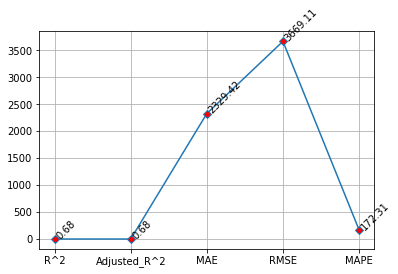

In [47]:
def regressionvalidation(model,x_train,y_train,x_test,y_test):
    
    coeff_df=pd.DataFrame(list(zip(x_train.columns,model.coef_)),columns=['Features','Predicted Coefficients'])
    y_pred=model.predict(x_test)
    y_train_pred=model.predict(x_train)
    n=y_test.shape[0]
    p=len(x_train.columns)
    
    #pred_df=pd.DataFrame(list(zip(y_train,y_train_pred,y_test,y_pred)),columns=['Y Train Value','Predicted Value','Y Test Value','Predicted value'])
    cols=['Metrics',model]
    metrics_df1=pd.DataFrame(columns=cols)
    metrics_df2=pd.DataFrame(columns=cols)
    
    r2=np.round(r2_score(y_true=y_test, y_pred=y_pred),2)
    v1=(1-r2)
    v2=(n-1)/(n-p-1)
    adjr2=np.round((1-(v1*v2)),2)
    mae=np.round(mean_absolute_error(y_test, y_pred),2)
    rmse=np.round(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)),2)
    mape=np.round(np.mean(np.abs((y_test-y_pred) / y_test)) * 100,2)
    
    
    pop=x_train.shape[0]+y_train.shape[0]
    metrics_df2.loc[0]=['Population',pop]
    metrics_df2.loc[1]=['Total Variable Involved',len(x_train.columns)]
    metrics_df2.loc[2]=['Target Variable',y_train.name]
    metrics_df2.loc[3]=['R^2',r2] # R^2
    
    metrics_df2.loc[4]=["Adjusted_R^2",adjr2]
    metrics_df2.loc[5]=["MAE",mae]
    metrics_df2.loc[6]=[ 'RMSE',rmse] # RMSE
    metrics_df2.loc[7]=['MAPE',mape] # MAPE
    
    metrics_dict={'R^2':r2,'Adjusted_R^2':adjr2,'MAE':mae,'RMSE':rmse,'MAPE':mape}
    x_labels = metrics_dict.items()
    x1, y1 = zip(*x_labels)
    plt.plot(x1,y1,marker='D',mfc='red')
    plt.grid(True)
    for x, y in zip(x1, y1):
        plt.text(x, y, np.round(y,2),rotation=45)
   
    #display_side_by_side([coeff_df, metrics_df2], ['Coefficients Table', 'Metrics Report'])
    display(coeff_df)
    display(metrics_df2)
    return None

regressionvalidation(model,x_train,y_train,x_test,y_test)

In [48]:
class CompareModels:
    def __init__(self):
        import pandas as pd
        self._models = pd.DataFrame(
            #data=['Population','Total Variable Involved','Target Variable','R^2', 'Adjusted R^2','MAE', 'RMSE','MAPE'],
            data=['R^2', 'Adjusted R^2','MAE', 'RMSE','MAPE'],
            columns=['Model']
        ).set_index(keys='Model')
        
        
       
        
    def add(self, model_name, y_test, y_pred,x_train,y_train):
        import numpy as np
        cols=['Metrics',model]
        metrics_df=pd.DataFrame(columns=cols)
        data1=[]
        
        n=y_test.shape[0]
        p=len(x_train.columns)
        pop=x_train.shape[0]+y_train.shape[0]
        
        v1=(1-r2_score(y_true=y_test, y_pred=y_pred))
        v2=(n-1)/(n-p-1)
        adjr2=(1-(v1*v2))
        self.coeff_df=list(zip(x_train.columns,model.coef_))
        self._models[model_name] = np.array(
            object=[
                
                np.round(r2_score(y_true=y_test, y_pred=y_pred),2), # R^2
                np.round(adjr2,2),#adjusted r2
                np.round(mean_absolute_error(y_test, y_pred),2),#MAE
                np.round(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)),2), # RMSE
                
                np.round(np.mean(np.abs((y_test-y_pred) / y_test)) * 100,2), # MAPE
               
                
            ]
        )
        
        result_df=pd.DataFrame(self._models[model_name]).reset_index()
        value_dict={'Population':[pop],'Total Variable Involved':[p],'Target Variable':y_train.name}
        #result_df=pd.concat([result_df, pd.DataFrame(value_dict.values(), columns=result_df.columns)], ignore_index=True)
        display(pd.DataFrame(value_dict))
        return result_df
    
         
   
    
    def show(self,**kwargs):
        import matplotlib.pyplot as plt
        
        kwargs['marker'] = kwargs.get('marker', 'D')
        kwargs['mfc'] = kwargs.get('mfc', 'red')
        
        self._models.plot(**kwargs)
        plt.xticks(range(len(self._models)), self._models.index)
        plt.xlabel('')
        plt.axis('auto')
        
        plt.show()

,Population,Total Variable Involved,Target Variable
0,53942,24,price_usd


,Model,Linear Regression
0,R^2,0.68
1,Adjusted R^2,0.68
2,MAE,2329.42
3,RMSE,3669.11
4,MAPE,172.31


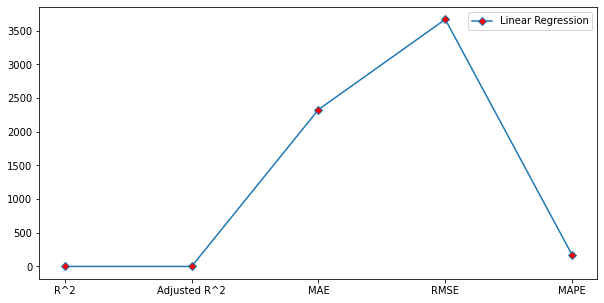

In [49]:
plot=CompareModels()

res=plot.add(model_name='Linear Regression', y_test=y_test, y_pred=y_pred,x_train=x_train,y_train=y_train)
display(res)

plot.show(figsize=(10, 5))

In [50]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10, random_state=10, n_jobs=-1)
rfr.fit(x_train, y_train)

# Predicting the yield
y_pred = rfr.predict(x_test)

,Population,Total Variable Involved,Target Variable
0,53942,24,price_usd


,Model,Random Forest
0,R^2,0.87
1,Adjusted R^2,0.87
2,MAE,1384.17
3,RMSE,2330.32
4,MAPE,77.44


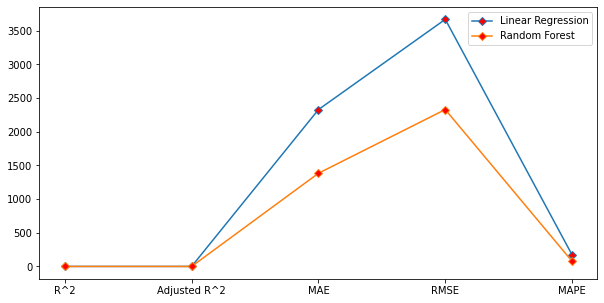

In [51]:
res1=plot.add('Random Forest', y_test, y_pred,x_train,y_train)
display(res1)
plot.show(figsize=(10, 5))

In [52]:
def top_n_perc_regression(topdf, old_var,new_var,top_n):
   
    tnlist,tplist,fplist,fnlist,sens,spec,ppv,npv,recall,acc,prevalence,f1_score,median,mean,maxv,minv,count,actual=([] for i in range(18))#

    #tnlist,tplist,fplist,fnlist,sens,spec,ppv,npv,recall,acc,prevalence,f1_score,median,top=([] for i in range(14))#
    new_prob=(new_var)+'_bin'
    old_prob=(old_var)+'_bin'
    #perc_list = list(range(1,top_n+1))
    


    bin_labels = ['0','1']

    perc_list = list(range(1, top_n+1))
    #topdf[old_prob]=pd.qcut(topdf[old_var].rank(method='first'), q=[0, t,1],labels=bin_labels)
    topdf[old_prob]=pd.qcut(topdf[old_var].rank(method='first'), top_n,labels=list(range(1,top_n+1)))

    #topdf[new_prob]=pd.qcut(topdf[new_var].rank(method='first'), q=[0, t,1],labels=bin_labels)
    topdf[new_prob]=pd.qcut(topdf[new_var].rank(method='first'), top_n,labels=list(range(1,top_n+1)))

    ds4=topdf.sort_values(new_prob,ascending=False)
    
    # Auc Score
    #auc=roc_auc_score(topdf[old_prob],topdf[new_prob])
    j=1
    for g, data in ds4.groupby([new_prob]):
        
        data['actual_col']=data[old_prob].copy()
        data['pred_col']=data[new_prob].copy()
        #display(data)
        for k in range(1,top_n+1):
            if(j==k):
                data['nw_actual_col']=np.where(data['actual_col'] !=j, 0, data['actual_col'])
                data['nw_actual_col']=np.where(data['nw_actual_col'] ==j, 1, data['nw_actual_col'])
                
                data['pred_col']=1
                #display(data)
        j+=1
        tn, fp, fn, tp = confusion_matrix(data['nw_actual_col'].astype(float), data['pred_col'].astype(float),labels=[0,1]).ravel()
  
        act=data[data['nw_actual_col']==1].count()
        cnt=data[new_var].count()
        tnlist.append(tn)
        tplist.append(tp)
        fplist.append(fp)
        fnlist.append(fn)
        count.append(cnt)
        actual.append(act[0])
        data.to_csv('temp.csv')
        median1=data[new_var].median()
        mean1=data[new_var].mean()
        mini=data[new_var].min()
        maxi=data[new_var].max()


        median.append(median1)
        mean.append(mean1)
        maxv.append(maxi)
        minv.append(mini)
        
    for i in range(0,len(tnlist)):
            
            population = tnlist[i]+fnlist[i]+tplist[i]+fplist[i]
        
            sens.append(np.round(tplist[i]/(tplist[i]+fnlist[i]),2))
            
            spec.append(np.round(tnlist[i]/(tnlist[i]+fplist[i]),2))
            
            ppv.append(np.round(tplist[i]/(tplist[i]+fplist[i]),2))
            
            npv.append(np.round(tnlist[i]/(fnlist[i]+tnlist[i]),2))
            
            recall.append(np.round(tplist[i]/(fnlist[i]+tplist[i]),2))
            
            acc.append(np.round((tplist[i] + tnlist[i])/ (tplist[i] + fnlist[i] + tnlist[i] + fplist[i]),2))
            
            #prevalence.append(np.round( (tplist[i]+fplist[i]) / population,2))
            f1_score.append(np.round(2* ((ppv[i] * recall[i])/ (ppv[i] + recall[i])),2))
   
            
  
    metrics_df=pd.DataFrame()
    metrics_df['Percentile']=perc_list
    
    metrics_df['N']=count
    metrics_df['Actual']=actual
    metrics_df['Mean']=mean
    metrics_df['Median']=median
    metrics_df['Maximum']=maxv
    metrics_df['Minimum']=minv
    
    metrics_df['TP']=tplist
    metrics_df['FP']=fplist
    metrics_df['TN']=tnlist
    metrics_df['FN']=fnlist
    metrics_df['Sensitivity']=sens
    metrics_df['Specificity']=spec
    metrics_df['PPV']=ppv
    metrics_df['NPV']=npv
    
    metrics_df['Accuracy']=acc
    metrics_df['F1 Score']=f1_score
    blankIndex=[''] * len(metrics_df)
    metrics_df.index=blankIndex  
    metrics_df.fillna(0,inplace=True)
    
    
    
    
    return metrics_df

In [53]:
topdf=df1.copy()
top_n_perc_regression(topdf,'y_test','y_pred',100)

,Percentile,N,Actual,Mean,Median,Maximum,Minimum,TP,FP,TN,FN,Sensitivity,Specificity,PPV,NPV,Accuracy,F1 Score
,1,116,14,-5640.609927,-4845.679110,-3445.644611,-14535.032705,14,102,0,0,1.0,0.0,0.12,0.0,0.12,0.21
,2,116,14,-2793.087933,-2757.220280,-2320.954264,-3427.127410,14,102,0,0,1.0,0.0,0.12,0.0,0.12,0.21
,3,115,6,-1972.531897,-1983.523788,-1627.738385,-2320.763524,6,109,0,0,1.0,0.0,0.05,0.0,0.05,0.10
,4,116,7,-1294.499257,-1258.981853,-1035.304238,-1626.601661,7,109,0,0,1.0,0.0,0.06,0.0,0.06,0.11
,5,115,5,-798.588479,-791.428360,-602.062648,-1029.648999,5,110,0,0,1.0,0.0,0.04,0.0,0.04,0.08
,6,116,3,-442.753107,-437.493088,-286.453892,-600.030008,3,113,0,0,1.0,0.0,0.03,0.0,0.03,0.06
,7,116,5,-155.959202,-158.821620,-41.567591,-285.120139,5,111,0,0,1.0,0.0,0.04,0.0,0.04,0.08
,8,115,5,66.184089,71.967129,144.762874,-40.596119,5,110,0,0,1.0,0.0,0.04,0.0,0.04,0.08
,9,116,6,257.426353,247.831344,384.397573,146.960751,6,110,0,0,1.0,0.0,0.05,0.0,0.05,0.10
,10,115,7,479.720712,479.771054,582.837080,385.116088,7,108,0,0,1.0,0.0,0.06,0.0,0.06,0.11
